In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv('../data/banks_data_1984.csv')
NI_df = pd.read_csv('../data/USNIM.csv')
ROA_df = pd.read_csv('../data/USROA.csv')
NP_df = pd.read_csv('../data/USNP.csv')
TAST_df = pd.read_csv('../data/USTAST.csv')

In [65]:
df.columns

Index(['DATE', 'US100NUM', 'US13NUM', 'US31NUM', 'US115NUM', 'USG15NUM',
       'US100NIM', 'US13NIM', 'US31NIM', 'US115NIM', 'USG15NIM', 'US100ROA',
       'US13ROA', 'US31ROA', 'US115ROA', 'USG15ROA', 'US100ROE', 'US13ROE',
       'US31ROE', 'US115ROE', 'USG15ROE', 'US100LLRTL', 'US13LLRTL',
       'US31LLRTL', 'US115LLRTL', 'USG15LLRTL', 'US100NPTL', 'US13NPTL',
       'US31NPTL', 'US115NPTL', 'USG15NPTL'],
      dtype='object')

In [66]:
#TODO: move this step to data set prep file
df = df.merge(NI_df, how = 'left')
df = df.merge(ROA_df, how = 'left')
df = df.merge(NP_df, how = 'left')
df = df.merge(TAST_df, how = 'left')
df.tail(8)

,DATE,US100NUM,US13NUM,US31NUM,US115NUM,USG15NUM,US100NIM,US13NIM,US31NIM,US115NIM,...,USG15LLRTL,US100NPTL,US13NPTL,US31NPTL,US115NPTL,USG15NPTL,USNIM,USROA,USNP,USTAST
133,2017-04-01,1298,1891,1197,519,77,3.78,3.83,3.81,3.77,...,1.28,1.24,1.03,0.92,0.87,1.29,3.12,1.07,104212021,15739705756
134,2017-07-01,1284,1871,1197,512,78,3.82,3.88,3.85,3.77,...,1.29,1.26,1.02,0.89,0.85,1.25,3.15,1.08,102553750,15902768562
135,2017-10-01,1269,1849,1184,506,81,3.84,3.90,3.85,3.81,...,1.26,1.16,0.94,0.82,0.83,1.26,3.17,0.94,103976758,16035845919
136,2018-01-01,1230,1821,1193,523,85,3.85,3.89,3.86,3.87,...,1.25,1.21,1.00,0.84,0.83,1.18,3.23,1.26,99165272,16147089295
137,2018-04-01,1218,1791,1182,529,86,3.88,3.93,3.91,3.89,...,1.24,1.21,0.98,0.80,0.80,1.08,3.30,1.34,93151960,16240091829
138,2018-07-01,1190,1776,1169,525,86,3.91,3.97,3.94,3.91,...,1.23,1.21,0.95,0.80,0.79,1.02,3.33,1.36,89714404,16350523149
139,2018-10-01,1165,1748,1161,526,87,3.94,3.99,3.98,3.92,...,1.22,1.16,0.89,0.76,0.77,0.99,3.35,1.35,88525345,16591224858
140,2019-01-01,1121,1710,1189,540,92,3.91,3.95,3.92,3.90,...,1.23,1.23,0.98,0.78,0.76,0.99,3.36,1.35,88950973,16769527586


In [67]:
df.DATE = pd.to_datetime(df.DATE, infer_datetime_format=True)
df.set_index("DATE", inplace = True)

In [68]:
#For now, we choose not to consider super big banks with assets greater than $15B
df['TinyBanksNum'] = df.US100NUM /(df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['SmallBanksNum'] = df.US13NUM / (df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['MidBanksNum'] = df.US31NUM / (df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['LargeBanksNum'] = df.US115NUM /(df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM)
df['BanksNum'] = df.US100NUM+df.US13NUM+df.US31NUM+df.US115NUM+df.USG15NUM

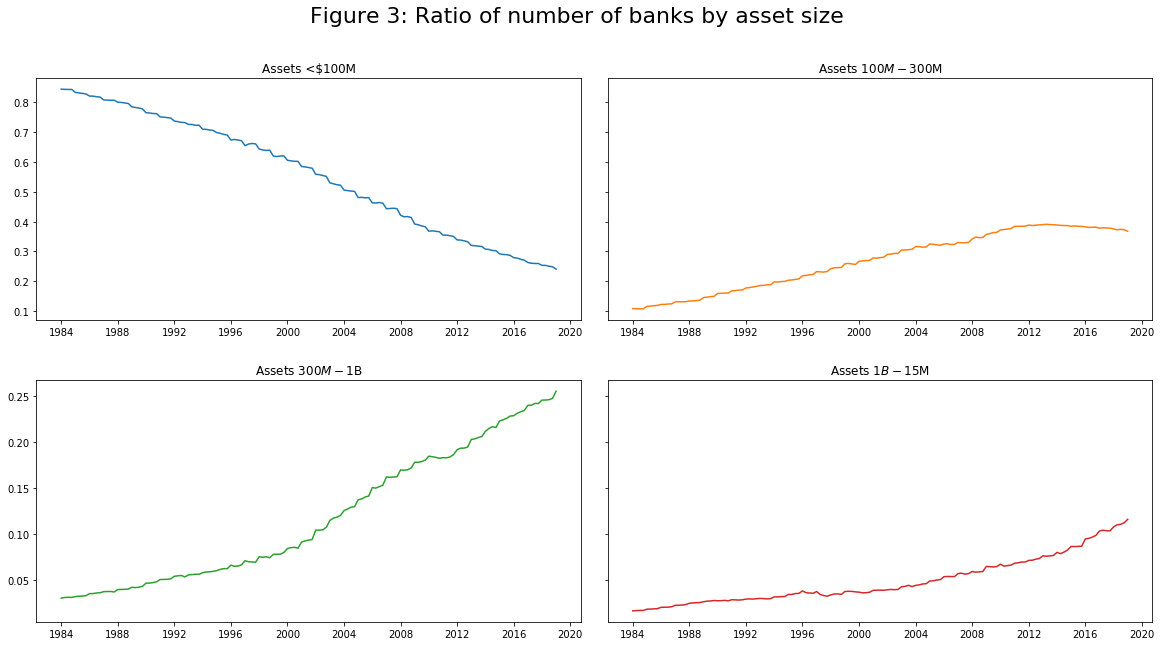

In [74]:
#TODO: fix y-axis into DateTime + consider changeng to 1 row (subplots(1,4))
fig, axs = plt.subplots(2, 2, figsize = (20,10), sharey='row', gridspec_kw={'hspace': 0.25, 'wspace': 0.05})
fig.suptitle('Figure 3: Ratio of number of banks by asset size', fontsize = 22)
axs[0, 0].plot(df.TinyBanksNum)
axs[0, 0].set_title('Assets <$100M')

axs[0, 1].plot(df.SmallBanksNum, 'tab:orange')
axs[0, 1].set_title('Assets $100M-$300M')
axs[1, 0].plot(df.MidBanksNum, 'tab:green')
axs[1, 0].set_title('Assets $300M-$1B')
axs[1, 1].plot(df.LargeBanksNum, 'tab:red')
axs[1, 1].set_title('Assets $1B-$15M')
plt.show()

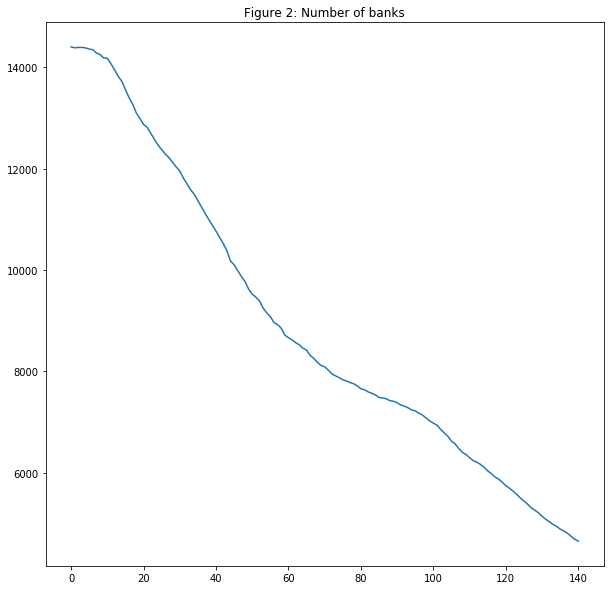

In [31]:
plt.figure(figsize = (10, 10))
plt.title ('Figure 2: Number of banks')
plt.plot(df.BanksNum)
plt.show()

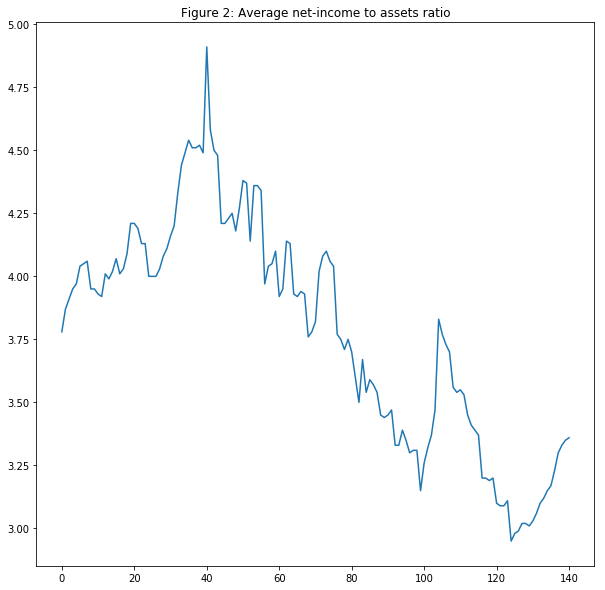

In [32]:
# Add major events to historical trend
plt.figure(figsize = (10, 10))
plt.title ('Figure 2: Average net-income to assets ratio')
plt.plot(df.USNIM)
plt.show()

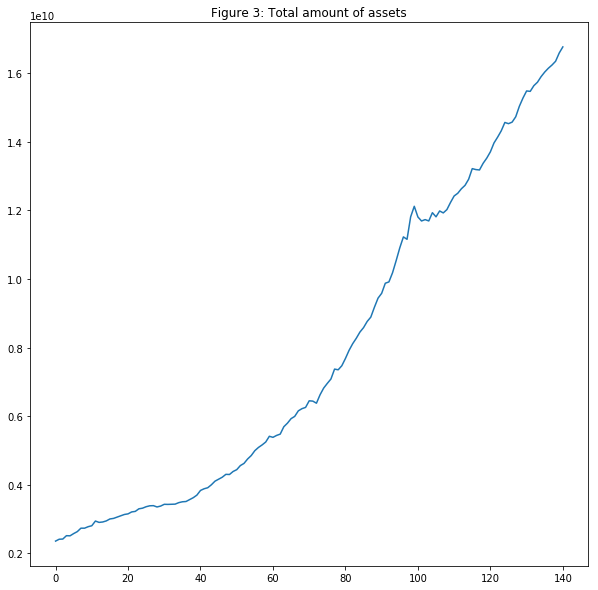

In [33]:

plt.figure(figsize = (10, 10))
plt.title ('Figure 3: Total amount of assets')
plt.plot(df.USTAST)
plt.show()

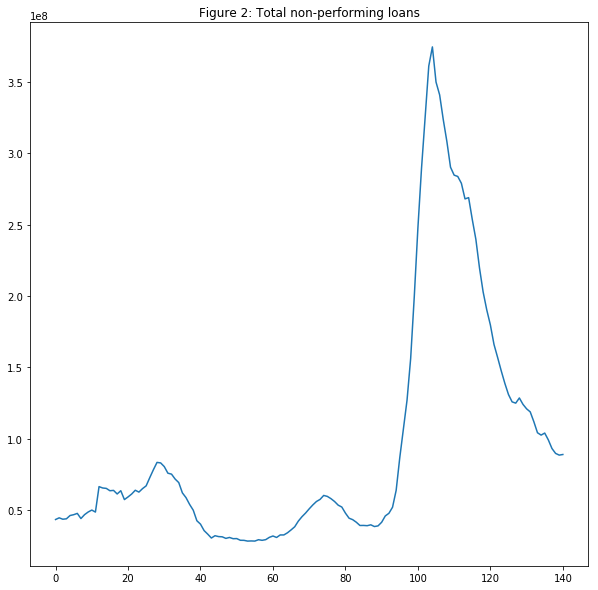

In [34]:
plt.figure(figsize = (10, 10))
plt.title ('Figure 2: Total non-performing loans')
plt.plot(df.USNP)
plt.show()

In [35]:
#Step 1: Consider regression NUM = b_0+b_1 * (NI)
mod = sm.OLS(df.BanksNum, sm.add_constant(df.USNIM))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     153.4
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           3.31e-24
Time:                        09:34:59   Log-Likelihood:                -1273.4
No. Observations:                 141   AIC:                             2551.
Df Residuals:                     139   BIC:                             2557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9047.0984   1460.536     -6.194      0.0

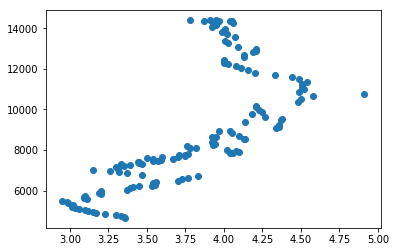

'Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual (characteristic #2). \nWe hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a \nstatistical test indicating the probability that the residuals are normally distributed. \nWe hope to see something close to 1 here. In this case Omnibus is relatively low and the Prob (Omnibus) \nis relatively high so the data is somewhat normal, but not altogether ideal. \nA linear regression approach would probably be better than random guessing but likely not as good as a \nnonlinear approach.\n\nSkew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution \nis normal. Note that this value also drives the Omnibus. This result has a small, and therefore good, skew.\n\nKurtosis – a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. \nGreater Kurtosis can be interpreted as a tighter clustering of resi

In [36]:
plt.scatter(x = df.USNIM, y = df.BanksNum)
plt.show()
'''Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual (characteristic #2). 
We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a 
statistical test indicating the probability that the residuals are normally distributed. 
We hope to see something close to 1 here. In this case Omnibus is relatively low and the Prob (Omnibus) 
is relatively high so the data is somewhat normal, but not altogether ideal. 
A linear regression approach would probably be better than random guessing but likely not as good as a 
nonlinear approach.

Skew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution 
is normal. Note that this value also drives the Omnibus. This result has a small, and therefore good, skew.

Kurtosis – a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. 
Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better 
model with few outliers.

Durbin-Watson – tests for homoscedasticity (characteristic #3). We hope to have a value between 1 and 2. 
In this case, the data is close, but within limits.

Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see 
in this test a confirmation of the Omnibus test. In this case we do.

Condition Number – This test measures the sensitivity of a function's output as compared to its input 
(characteristic #4). When we have multicollinearity, we can expect much higher fluctuations to small 
changes in the data, hence, we hope to see a relatively small number, something below 30. 
In this case we are well below 30, which we would expect given our model only has two variables and one 
is a constant.'''

In [37]:
#Step 2: Run model for the first 24 qaurters - start of the period 
y_start = df.BanksNum.iloc[0:24]
x_start = df.USNIM.iloc[0:24]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     39.45
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           2.54e-06
Time:                        09:35:10   Log-Likelihood:                -176.18
No. Observations:                  24   AIC:                             356.4
Df Residuals:                      22   BIC:                             358.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.291e+04   3048.333     10.795      0.0

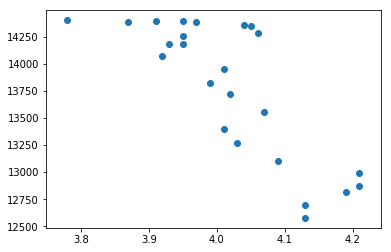

In [38]:
plt.scatter(y=y_start, x=x_start)

In [39]:
#Step 3: Run model for last 24 qaurters - end of the period
y_end = df.BanksNum.iloc[117:141]
x_end = df.USNIM.iloc[117:141]
mod = sm.OLS(y_end, sm.add_constant(x_end))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     5.591
Date:                Wed, 31 Jul 2019   Prob (F-statistic):             0.0273
Time:                        09:35:15   Log-Likelihood:                -174.48
No. Observations:                  24   AIC:                             353.0
Df Residuals:                      22   BIC:                             355.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9943.1402   1983.184      5.014      0.0

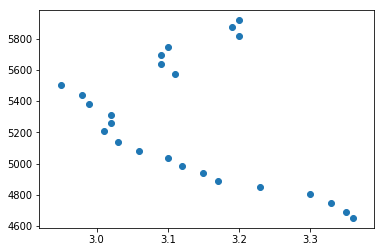

In [40]:
plt.scatter(x=x_end, y=y_end )

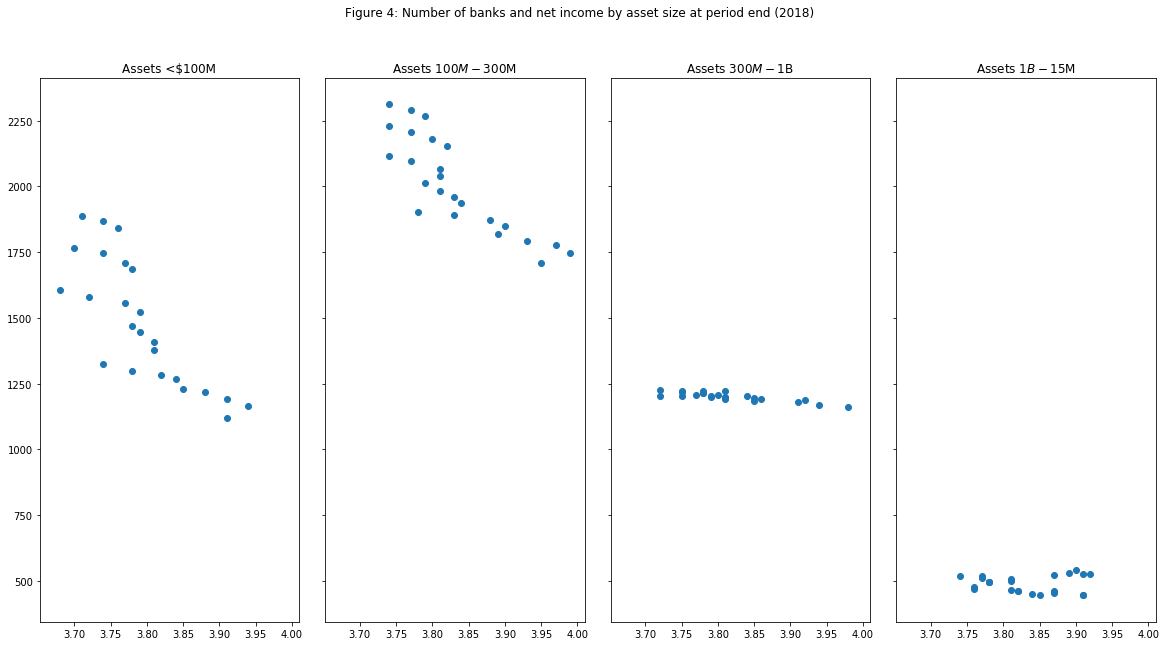

In [41]:


fig, axs = plt.subplots(1, 4, figsize = (20,10), sharey = 'row', sharex = 'row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
fig.suptitle('Figure 4: Number of banks and net income by asset size at period end (2018)')
(ax1, ax2, ax3, ax4) = axs
ax1.scatter(y = df.US100NUM.iloc[117:141], x = df.US100NIM.iloc[117:141])
ax1.set_title('Assets <$100M')
ax2.scatter(y = df.US13NUM.iloc[117:141], x = df.US13NIM.iloc[117:141])
ax2.set_title('Assets $100M-$300M')
ax3.scatter(y = df.US31NUM.iloc[117:141], x = df.US31NIM.iloc[117:141])
ax3.set_title('Assets $300M-$1B')
ax4.scatter(y = df.US115NUM.iloc[117:141], x = df.US115NIM.iloc[117:141])
ax4.set_title('Assets $1B-$15M')
plt.show()

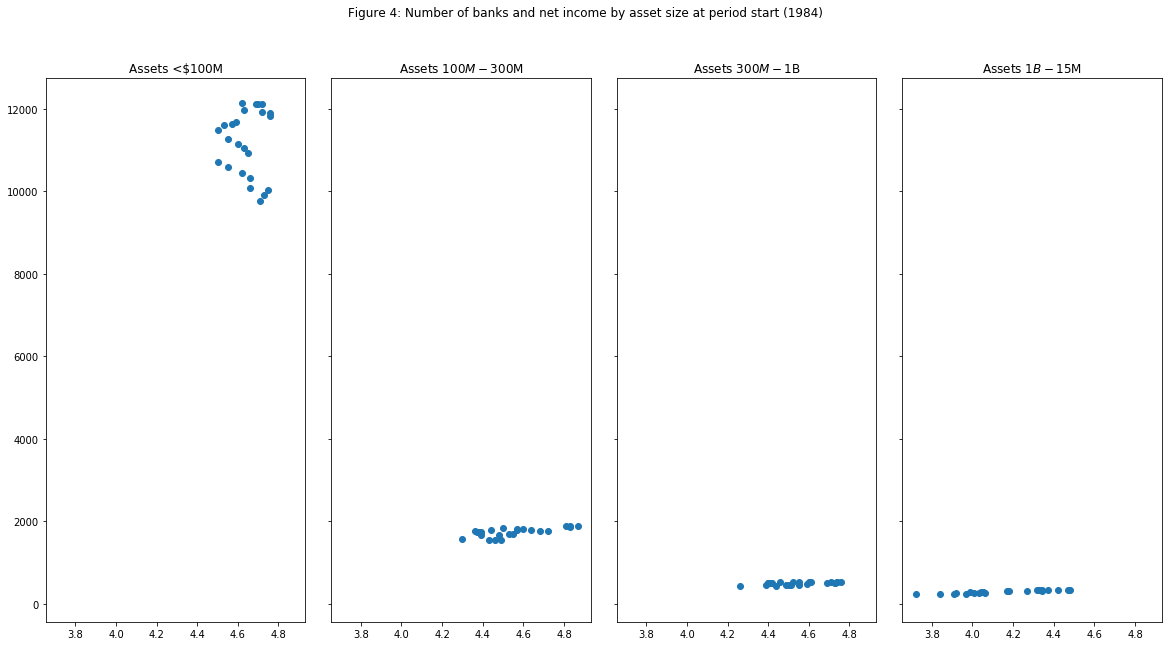

In [42]:
fig, axs = plt.subplots(1, 4, figsize = (20,10), sharey = 'row', sharex = 'row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
fig.suptitle('Figure 4: Number of banks and net income by asset size at period start (1984)')
(ax1, ax2, ax3, ax4) = axs
ax1.scatter(y = df.US100NUM.iloc[0:24], x = df.US100NIM.iloc[0:24])
ax1.set_title('Assets <$100M')
ax2.scatter(y = df.US13NUM.iloc[0:24], x = df.US13NIM.iloc[0:24])
ax2.set_title('Assets $100M-$300M')
ax3.scatter(y = df.US31NUM.iloc[0:24], x = df.US31NIM.iloc[0:24])
ax3.set_title('Assets $300M-$1B')
ax4.scatter(y = df.US115NUM.iloc[0:24], x = df.US115NIM.iloc[0:24])
ax4.set_title('Assets $1B-$15M')
plt.show()

In [43]:
#Regression of form NUM = b_0+b_1(USTATS)
#Step N: Run model for the first 24 qaurters - start of the period 
y_start = df.BanksNum.iloc[0:24]
x_start = df.USTAST.iloc[0:24]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           1.39e-10
Time:                        09:35:23   Log-Likelihood:                -165.61
No. Observations:                  24   AIC:                             335.2
Df Residuals:                      22   BIC:                             337.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.97e+04    530.973     37.111      0.0

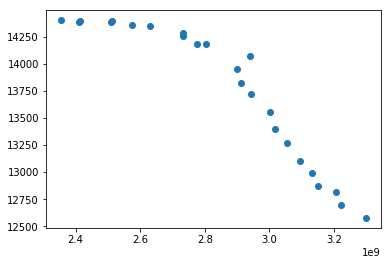

In [44]:
plt.scatter(y=y_start, x=x_start)
plt.show()



In [45]:
#Regression of form NUM = b_0+b_1(USTATS)
#Step N: Run model for the last 24 qaurters - end of the period 
y_end = df.BanksNum.iloc[117:141]
x_end = df.USTAST.iloc[117:141]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           1.39e-10
Time:                        09:35:27   Log-Likelihood:                -165.61
No. Observations:                  24   AIC:                             335.2
Df Residuals:                      22   BIC:                             337.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.97e+04    530.973     37.111      0.0

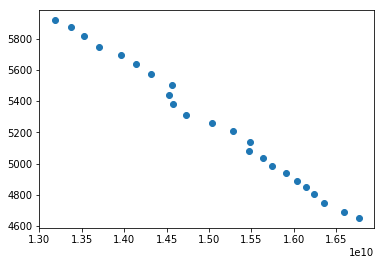

In [46]:
plt.scatter(y=y_end, x=x_end)
plt.show()


In [47]:
#Regression of form NUM = b_0+b_1(USTATS)+b_2(NP)
#Step N: Run model for the first 24 qaurters - start of the period 

y_start = df.BanksNum.iloc[0:24]
x_start = df[['USNP', 'USTAST']].iloc[0:24]
#X = df_adv[['TV', 'Radio']]
#x_start = df.USTAST.iloc[0:24]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     60.43
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           1.94e-09
Time:                        09:35:31   Log-Likelihood:                -165.58
No. Observations:                  24   AIC:                             337.2
Df Residuals:                      21   BIC:                             340.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.966e+04    582.806     33.733      0.0

In [48]:
#Regression of form NUM = b_0+b_1(USTATS)+b_2(NP)
#Step N: Run model for the last 24 qaurters - end of the period 

y_start = df.BanksNum.iloc[117:141]
x_start = df[['USNP', 'USTAST']].iloc[117:141]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               BanksNum   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1603.
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           1.10e-23
Time:                        09:35:40   Log-Likelihood:                -116.78
No. Observations:                  24   AIC:                             239.6
Df Residuals:                      21   BIC:                             243.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.063e+04    426.780     24.904      0.0

In [318]:
#Use this for table
res.pvalues
#res.conf_int()
'''
US100NUM', 'US13NUM', 'US31NUM', 'US115NUM', 'USG15NUM', 'US100NIM',
       'US13NIM', 'US31NIM', 'US115NIM', 'USG15NIM', 'US100ROA', 'US13ROA',
       'US31ROA', 'US115ROA', 'USG15ROA', 'US100ROE', 'US13ROE', 'US31ROE',
       'US115ROE', 'USG15ROE', 'US100LLRTL', 'US13LLRTL', 'US31LLRTL',
       'US115LLRTL', 'USG15LLRTL', 'US100NPTL', 'US13NPTL', 'US31NPTL',
       'US115NPTL', 'USG15NPTL', 'USNIM', 'USROA', 'USNP', 'USTAST''''

const     6.627351e-24
USNP      5.465594e-02
USTAST    1.242208e-06
dtype: float64

In [75]:
y_start = df.US100NIM.iloc[0:24]
x_start = df[['US100ROA', 'US100ROE', 'US100LLRTL', 'US100NPTL']].iloc[0:24]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               US100NIM   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     6.590
Date:                Wed, 31 Jul 2019   Prob (F-statistic):            0.00168
Time:                        11:20:41   Log-Likelihood:                 37.199
No. Observations:                  24   AIC:                            -64.40
Df Residuals:                      19   BIC:                            -58.51
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2453      0.255     20.558      0.0

In [49]:
y_start = df.US100NIM.iloc[117:141]
x_start = df[['US100ROA', 'US100ROE', 'US100LLRTL', 'US100NPTL']].iloc[117:141]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               US100NIM   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     15.26
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           9.60e-06
Time:                        09:36:07   Log-Likelihood:                 48.042
No. Observations:                  24   AIC:                            -86.08
Df Residuals:                      19   BIC:                            -80.19
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4632      0.782      5.710      0.0

In [321]:
y_start = df.US100NIM.iloc[117:141]
x_start = df[['US100ROA', 'US100NPTL']].iloc[117:141]
mod = sm.OLS(y_start, sm.add_constant(x_start))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               US100NIM   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     29.30
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           8.38e-07
Time:                        15:10:59   Log-Likelihood:                 44.676
No. Observations:                  24   AIC:                            -83.35
Df Residuals:                      21   BIC:                            -79.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9619      0.238     16.675      0.0

In [50]:
df.columns

Index(['DATE', 'US100NUM', 'US13NUM', 'US31NUM', 'US115NUM', 'USG15NUM',
       'US100NIM', 'US13NIM', 'US31NIM', 'US115NIM', 'USG15NIM', 'US100ROA',
       'US13ROA', 'US31ROA', 'US115ROA', 'USG15ROA', 'US100ROE', 'US13ROE',
       'US31ROE', 'US115ROE', 'USG15ROE', 'US100LLRTL', 'US13LLRTL',
       'US31LLRTL', 'US115LLRTL', 'USG15LLRTL', 'US100NPTL', 'US13NPTL',
       'US31NPTL', 'US115NPTL', 'USG15NPTL', 'TinyBanksNum', 'SmallBanksNum',
       'MidBanksNum', 'LargeBanksNum', 'BanksNum', 'USNIM', 'USROA', 'USNP',
       'USTAST'],
      dtype='object')

In [61]:
#Penalized estimation -- variable selection with Ridge and Lasso algorithm
#First, run Small banks number on all the features
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error

y = df.SmallBanksNum
x = df[['US100NIM', 'US13NIM', 'US31NIM', 'US115NIM', 'US100ROA',
       'US13ROA', 'US31ROA', 'US115ROA', 'US100ROE', 'US13ROE',
       'US31ROE', 'US115ROE', 'US100LLRTL', 'US13LLRTL',
       'US31LLRTL', 'US115LLRTL', 'US100NPTL', 'US13NPTL',
       'US31NPTL', 'US115NPTL']]
# Perform test train split
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)
# Build a Ridge, Lasso and regular linear regression model. 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print('Ridge parameter coefficients:', ridge.coef_)
print('Training r^2:', ridge.score(X_train, y_train))
print('Testing r^2:', ridge.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, ridge.predict(X_test)))
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print('Lasso parameter coefficients:', lasso.coef_)
print('Training r^2:', lasso.score(X_train, y_train))
print('Testing r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, lasso.predict(X_test)))

Lasso parameter coefficients: [-0.03275357 -0.01464955 -0.04764989 -0.02116696  0.0609239   0.04857894
  0.07731985  0.06047817 -0.00546644 -0.01568078 -0.00120516 -0.00450359
 -0.01706243  0.04682428  0.02525194  0.0020609  -0.04304604  0.00545292
  0.03868115 -0.02636354]
Training r^2: 0.9872221703447474
Testing r^2: 0.9726438557086272
Training MSE: 0.0001037022207460091
Testing MSE: 0.00029262968351826123
Lasso parameter coefficients: [-0.         -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.00965202 -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]
Training r^2: 0.3245168726875955
Testing r^2: 0.0794844482073205
Training MSE: 0.005482081250782666
Testing MSE: 0.009846788777162566


In [76]:
#Second, run Small bank number on small bank features only

y = df.SmallBanksNum
x = df[['US100NIM', 'US100ROA', 'US100ROE', 'US100LLRTL', 'US100NPTL']]
# Perform test train split
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12) 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print('Ridge parameter coefficients:', ridge.coef_)
print('Training r^2:', ridge.score(X_train, y_train))
print('Testing r^2:', ridge.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, ridge.predict(X_test)))
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print('Lasso parameter coefficients:', lasso.coef_)
print('Training r^2:', lasso.score(X_train, y_train))
print('Testing r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, lasso.predict(X_test)))

Ridge parameter coefficients: [-0.12505165  0.22573377 -0.03018296  0.0744907  -0.03678268]
Training r^2: 0.9561552215149846
Testing r^2: 0.890746063803487
Training MSE: 0.00035583514725787976
Testing MSE: 0.0011686933813400183
Lasso parameter coefficients: [-0.         -0.         -0.00965202  0.         -0.        ]
Training r^2: 0.3245168726875955
Testing r^2: 0.0794844482073205
Training MSE: 0.005482081250782666
Testing MSE: 0.009846788777162566


In [ ]:
#Code for multiple plots:

plt.figure(figsize=(16, 12))

for (i, j) in enumerate(weights):
    plt.subplot(3, 5, i + 1)
    plt.title(list(X)[i], size='medium')
    plt.plot(weight_col.iloc[i].T)
    plt.axis('tight')

Text(0.5, 1.0, 'Sigmoid function demo')

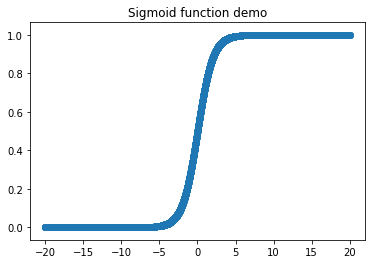

In [4]:
#Sigmoid function:

import numpy as np
def sigmoid(x):
    x = np.array(x)
    return 1/(1+np.e**(-1*x))

x = np.linspace(start=-20, stop=20, num=10**4)
y = [sigmoid(xi) for xi in x]
plt.scatter(x, y)
plt.title("Sigmoid function demo")

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2)
logreg.fit(x, y)

#LogisticRegression(C=1e+16, class_weight=None, dual=False,
#           fit_intercept=False, intercept_scaling=1, max_iter=100,
#           multi_class='ovr', n_jobs=1, penalty='l2', random_state=2,
#           solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[-20.        -19.9959996 -19.9919992 ...  19.9919992  19.9959996
  20.       ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.